## Exploratory Data Analysis on COVID19
Coronavirus disease is a contagious disease that is believed to have started in Wuhan, China in the month of December, 2019. The virus has been spreading worldwide since then and still hasn't been controlled. Several vaccines have been approved and distributed leading to mass vaccination drives. However, the virus seems to be constantly evolving and has not been properly controlled yet.
This analysis is for experimenting and the data can be found on Kaggle as a public dataset.

In [1]:
# Setting up the environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Importing data
covid_df = pd.read_csv("covid_19_india.csv")

In [3]:
# have a look at the dataset
covid_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


### Cleaning the data for analysis

In [4]:
# Checking each column for null values
covid_df.isnull().sum(axis = 0)

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [5]:
# removing the leading and trailing spaces in the column if there is any
covid_df["State/UnionTerritory"] = covid_df["State/UnionTerritory"].str.strip()

In [6]:
# how many unique values are there in the state column
covid_df["State/UnionTerritory"].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
       'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
       'Maharashtra***'], dtype=object)

There seems to be some typos in the State/UnionTerritory column. The following codes will set it right.

In [7]:
covid_df["State/UnionTerritory"] = covid_df["State/UnionTerritory"].replace(['Bihar****'], 'Bihar')

In [8]:
covid_df["State/UnionTerritory"] = covid_df["State/UnionTerritory"].replace(['Madhya Pradesh***'],
                                                                            'Madhya Pradesh')

In [9]:
covid_df["State/UnionTerritory"] = covid_df["State/UnionTerritory"].replace(['Himanchal Pradesh'], 
                                                                            'Himachal Pradesh')

In [10]:
covid_df["State/UnionTerritory"] = covid_df["State/UnionTerritory"].replace(['Karanataka'], 'Karnataka')

In [11]:
covid_df["State/UnionTerritory"] = covid_df["State/UnionTerritory"].replace(['Maharashtra***'], 'Maharashtra')

In [12]:
covid_df["State/UnionTerritory"] = covid_df["State/UnionTerritory"].replace(['Dadra and Nagar Haveli and Daman and Diu'],
                                                                            'Dadra and Nagar Haveli')

In [13]:
covid_df["State/UnionTerritory"] = covid_df["State/UnionTerritory"].replace(['Telengana'], 'Telangana')

In [14]:
# checking the size of the dataframe before removing some data
covid_df.shape

(18110, 9)

In [15]:
covid_df = covid_df.loc[covid_df["State/UnionTerritory"] != "Unassigned"]

In [16]:
covid_df = covid_df.loc[covid_df["State/UnionTerritory"] != "Cases being reassigned to states"]

In [17]:
# checking if all the values have been assigned properly
covid_df["State/UnionTerritory"].unique()

array(['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura',
       'Nagaland', 'Meghalaya', 'Dadra and Nagar Haveli', 'Sikkim',
       'Daman & Diu', 'Lakshadweep'], dtype=object)

In [18]:
# checking the shape again to note how many records were lost
covid_df.shape

(18047, 9)

Next, there will be a check if any of the columns has null values.

In [19]:
covid_df["Date"].isnull().sum(axis = 0)

0

In [20]:
covid_df["Time"].isnull().sum(axis = 0)

0

In [21]:
covid_df["ConfirmedIndianNational"].isnull().sum(axis = 0)

0

In [22]:
covid_df["ConfirmedForeignNational"].isnull().sum(axis = 0)

0

In [23]:
# this is also a good way to learn if columns contain null values
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18047 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18047 non-null  int64 
 1   Date                      18047 non-null  object
 2   Time                      18047 non-null  object
 3   State/UnionTerritory      18047 non-null  object
 4   ConfirmedIndianNational   18047 non-null  object
 5   ConfirmedForeignNational  18047 non-null  object
 6   Cured                     18047 non-null  int64 
 7   Deaths                    18047 non-null  int64 
 8   Confirmed                 18047 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.4+ MB


In [24]:
# adding a Date column
covid_df["Date"] = pd.to_datetime(covid_df["Date"])

In [25]:
# adding a Month column
covid_df["Month"] = covid_df["Date"].dt.month_name()

In [26]:
# adding a Year column
covid_df["Year"] = covid_df["Date"].dt.year

In [27]:
# checking out the dataframe with added columns
covid_df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Month,Year
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,January,2020
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,January,2020
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,February,2020
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,February,2020
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,February,2020
...,...,...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353,August,2021
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660,August,2021
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462,August,2021
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812,August,2021


## Descriptive Analysis
As you can see below, the last data recorded in this dataset was on 11th August, 2021. So, the following analysis is valid till the mentioned date.

In [28]:
covid_df["Date"].max()

Timestamp('2021-08-11 00:00:00')

In [29]:
# find the total confirmed cases in each state
total_confirmed = covid_df.groupby("State/UnionTerritory")["Confirmed"].aggregate(max)

In [30]:
total_confirmed

State/UnionTerritory
Andaman and Nicobar Islands       7548
Andhra Pradesh                 1985182
Arunachal Pradesh                50605
Assam                           576149
Bihar                           725279
Chandigarh                       61992
Chhattisgarh                   1003356
Dadra and Nagar Haveli           10654
Daman & Diu                          2
Delhi                          1436852
Goa                             172085
Gujarat                         825085
Haryana                         770114
Himachal Pradesh                208616
Jammu and Kashmir               322771
Jharkhand                       347440
Karnataka                      2921049
Kerala                         3586693
Ladakh                           20411
Lakshadweep                      10263
Madhya Pradesh                  791980
Maharashtra                    6363442
Manipur                         105424
Meghalaya                        69769
Mizoram                          46320
Naga

In [31]:
# find the total death cases in each state
total_deaths = covid_df.groupby("State/UnionTerritory")["Deaths"].max()

In [32]:
total_deaths

State/UnionTerritory
Andaman and Nicobar Islands       129
Andhra Pradesh                  13564
Arunachal Pradesh                 248
Assam                            5420
Bihar                            9646
Chandigarh                        811
Chhattisgarh                    13544
Dadra and Nagar Haveli              4
Daman & Diu                         0
Delhi                           25068
Goa                              3164
Gujarat                         10077
Haryana                          9652
Himachal Pradesh                 3537
Jammu and Kashmir                4392
Jharkhand                        5130
Karnataka                       36848
Kerala                          18004
Ladakh                            207
Lakshadweep                        51
Madhya Pradesh                  10514
Maharashtra                    134201
Manipur                          1664
Meghalaya                        1185
Mizoram                           171
Nagaland                     

In [33]:
# find the total cured cases in each state
total_cured = covid_df.groupby("State/UnionTerritory")["Cured"].max()

In [34]:
total_cured

State/UnionTerritory
Andaman and Nicobar Islands       7412
Andhra Pradesh                 1952736
Arunachal Pradesh                47821
Assam                           559684
Bihar                           715352
Chandigarh                       61150
Chhattisgarh                    988189
Dadra and Nagar Haveli           10646
Daman & Diu                          0
Delhi                          1411280
Goa                             167978
Gujarat                         814802
Haryana                         759790
Himachal Pradesh                202761
Jammu and Kashmir               317081
Jharkhand                       342102
Karnataka                      2861499
Kerala                         3396184
Ladakh                           20130
Lakshadweep                      10165
Madhya Pradesh                  781330
Maharashtra                    6159676
Manipur                          96776
Meghalaya                        64157
Mizoram                          33722
Naga

In [35]:
# aggregating the cases in one dataframe
total_cases = covid_df.groupby("State/UnionTerritory")["Confirmed", "Cured", "Deaths"].aggregate(max)

C:\Users\91878\AppData\Local\Temp/ipykernel_13832/2913830497.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_cases = covid_df.groupby("State/UnionTerritory")["Confirmed", "Cured", "Deaths"].aggregate(max)


In [36]:
total_cases

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,7548,7412,129
Andhra Pradesh,1985182,1952736,13564
Arunachal Pradesh,50605,47821,248
Assam,576149,559684,5420
Bihar,725279,715352,9646
Chandigarh,61992,61150,811
Chhattisgarh,1003356,988189,13544
Dadra and Nagar Haveli,10654,10646,4
Daman & Diu,2,0,0


Having a look at the top 5 states in each category:

In [37]:
top_confirmed = total_cases.sort_values("Confirmed", ascending = False).iloc[0:5]
top_cured = total_cases.sort_values("Cured", ascending = False).iloc[0:5]
top_deaths = total_cases.sort_values("Deaths", ascending = False).iloc[0:5]

In [38]:
top_confirmed

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Maharashtra,6363442,6159676,134201
Kerala,3586693,3396184,18004
Karnataka,2921049,2861499,36848
Tamil Nadu,2579130,2524400,34367
Andhra Pradesh,1985182,1952736,13564


In [39]:
top_cured

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Maharashtra,6363442,6159676,134201
Kerala,3586693,3396184,18004
Karnataka,2921049,2861499,36848
Tamil Nadu,2579130,2524400,34367
Andhra Pradesh,1985182,1952736,13564


In [40]:
top_deaths

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Maharashtra,6363442,6159676,134201
Karnataka,2921049,2861499,36848
Tamil Nadu,2579130,2524400,34367
Delhi,1436852,1411280,25068
Uttar Pradesh,1708812,1685492,22775


In [41]:
# creating a new dataframe that contains total cases
list1 = ["Confirmed", "Cured", "Deaths"]
list2 = [total_cases["Confirmed"].sum(axis=0), total_cases["Cured"].sum(axis=0), 
        total_cases["Deaths"].sum(axis=0)]
country_total = pd.DataFrame(list(zip(list1, list2)))

In [42]:
# adding column names to the dataframe
country_total.columns = ["Status", "Cases"]
country_total

,Status,Cases
0,Confirmed,32036513
1,Cured,31220981
2,Deaths,429179


In [43]:
# aggregating by month
month_total = covid_df.groupby("Month")["Confirmed"].aggregate(max)

In [44]:
month_total

Month
April        4539553
August       6363442
December     1928603
February     2146777
January      2023814
July         6296756
June         6051633
March        2773436
May          5731815
November     1820059
October      1672858
September    1366129
Name: Confirmed, dtype: int64

In [45]:
# cfeating two new lists for a new dataframe
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
cases = [month_total["January"], month_total["February"],month_total["March"],month_total["April"],
        month_total["May"],month_total["June"],month_total["July"],month_total["August"],
        month_total["September"],month_total["October"],month_total["November"],
         month_total["December"]]

In [46]:
# creating a new dataframe to store number of cases by month
month_cases = pd.DataFrame(zip(months,cases))
month_cases.columns = ["Month", "Cases"]
month_cases

,Month,Cases
0,Jan,2023814
1,Feb,2146777
2,Mar,2773436
3,Apr,4539553
4,May,5731815
5,Jun,6051633
6,Jul,6296756
7,Aug,6363442
8,Sep,1366129
9,Oct,1672858


## Visualizations

Text(0, 0.5, 'Number of cases in millions')

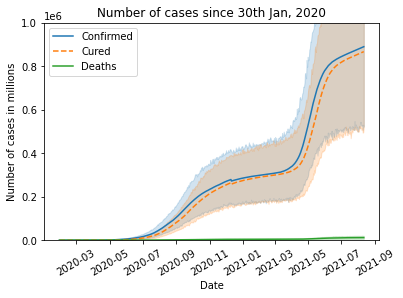

In [47]:
# plotting a time series graph of the number of cases
sns.lineplot(data=covid_df, x="Date", y="Confirmed", label="Confirmed")
sns.lineplot(data=covid_df, x="Date", y="Cured", label="Cured", linestyle="dashed")
sns.lineplot(data=covid_df, x="Date", y="Deaths", label="Deaths")
plt.xticks(rotation=30)
plt.ylim((0, 1000000))
plt.title("Number of cases since 30th Jan, 2020")
plt.ylabel("Number of cases in millions")

Text(0.5, 1.0, 'Comparison of Confirmed, Cured and Death cases in India')

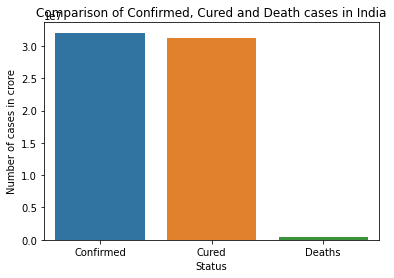

In [48]:
# comparing the number of confirmed, cured and death cases
sns.barplot(data=country_total, x="Status", y="Cases")
plt.xlabel("Status")
plt.ylabel("Number of cases in crore")
plt.title("Comparison of Confirmed, Cured and Death cases in India")

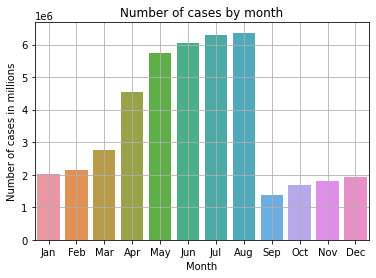

In [49]:
sns.barplot(data=month_cases, x="Month", y="Cases")
plt.ylabel("Number of cases in millions")
plt.title("Number of cases by month")
plt.grid()

## Conclusion
* On 11th August, 2021, total number of confirmed cases in India had reached 3.2 crores, out of which 3.1 crore poeple had been cured and the number of reported deaths was around 4.29 lakhs.
* Maharashtra, Kerala and Karnataka were the top three states with the most confirmed cases.
* In the cases by month graph, we see that the number of cases are less in winter months compared to summer months, which might suggest that coronavirus becomes more active in summer. However, I need more data to support this hypothesis.